# `tabula-rasa/py/sklearn/D.ipynb`

---

My solutions for part D of [/12_mod_scikitlearn/05-Exercises.ipynb](https://github.com/lrangellara/tts-ds-fundamentals-course/blob/main/datascience/python/12_mod_scikitlearn/05-Exercises.ipynb)

## 🐍 Python imports 🐍

In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [76]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

## 🎨 Styling 🎨

In [3]:
# plt.style.use("./../../style/ai.mplstyle")

path = os.path.join(".", "..", "..", "style", "ai.mplstyle")
plt.style.use(path)

## 📁 Data loading 📁

In [22]:
# pd.read_csv("./../../data/iris.csv")

path = os.path.join(".", "..", "..", "data", "iris.csv")
df = pd.read_csv(path)

df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [23]:
df.drop(columns="Id", inplace=True)

In [24]:
df.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


## ❄ Exercise 1.

---

Write a Python program to view some basic statistical details like percentile, mean, std etc. of the species of 'Iris-setosa', 'Iris-versicolor' and 'Iris-versicolor'.

In [13]:
ser = df["Species"] == "Iris-setosa"
df_setosa = df[ser]

df_setosa.tail(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
47,4.6,3.2,1.4,0.2,Iris-setosa
48,5.3,3.7,1.5,0.2,Iris-setosa
49,5.0,3.3,1.4,0.2,Iris-setosa


In [25]:
df_setosa.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [15]:
ser = df["Species"] == "Iris-versicolor"
df_versicolor = df[ser]

df_versicolor.tail(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor
99,5.7,2.8,4.1,1.3,Iris-versicolor


In [26]:
df_versicolor.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [16]:
ser = df["Species"] == "Iris-virginica"
df_virginica = df[ser]

df_virginica.tail(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [27]:
df_virginica.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


## 🌸 Exercise 2.

---

Write a Python program to create a scatter plot using sepal length and petal_width to separate the Species classes.

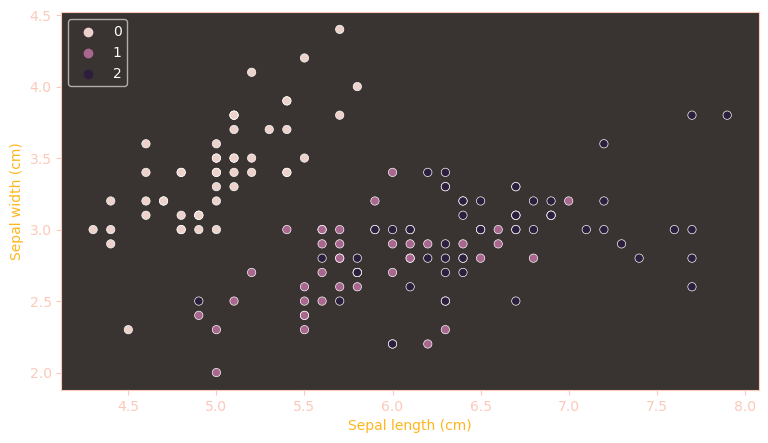

In [69]:
fix, ax = plt.subplots(figsize=[9, 5], dpi=100)

sns.scatterplot(ax=ax, data=df, x="SepalLengthCm", y="SepalWidthCm", hue="Species")

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.legend(loc="upper left")

plt.show()

## ❄ Exercise 3.

---

In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships among variables. It includes many techniques for modeling and analyzing several variables, when the focus is on the relationship between a dependent variable and one or more independent variables (or 'predictors'). Write a Python program to get the accuracy of the Logistic Regression.

In [94]:
X = df.drop(columns="Species", inplace=False).values
Y = df["Species"].values

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.20, random_state=2022
)

In [101]:
model = LogisticRegression(random_state=2022, solver="lbfgs", multi_class="multinomial")
model.fit(X_train, Y_train)

LogisticRegression(multi_class='multinomial', random_state=2022)

In [104]:
prediction = model.predict(X_test)
metrics.accuracy_score(prediction, Y_test)

0.9666666666666667